In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [2]:
circuits = pd.read_csv('archive/circuits.csv')
race = pd.read_csv('archive/races.csv', parse_dates=['date'])
status = pd.read_csv('archive/status.csv')
result = pd.read_csv('archive/results.csv')
world = pd.read_csv('countries.csv')
drivers = pd.read_csv('archive/drivers.csv',parse_dates=['dob'])
constructors = pd.read_csv('archive/constructors.csv')

In [3]:
race_result = pd.merge(result, race, on='raceId')
sec_set = pd.merge(race_result, circuits, on='circuitId')
circuits_by_country_df = pd.merge(sec_set, status, on='statusId')

In [4]:
def my_box(df, years):
    '''
    Returns DataFrame with ths eras, split by the period of time I wanted.
    
    df: I wanted to split the data history by 3 parts to follow trends.
        In this query I define the years I want to follow with the 'pd.loc' function.

    years: the years to desplay later in the boxplot x axis.
    '''
    
    part = df[['driverId', 'raceId']].groupby('raceId').count() # Takes only drivers that participate in this era and count them
    part.reset_index(inplace=True)
    new_part = part[['driverId']].rename(columns={'driverId': years}) # Rename x-axis for a relevat presentation
    # new_part.boxplot()   ## Optional, to display each era seperatly. but than it won't display the final one
    return new_part


In [5]:
new_50s = my_box(circuits_by_country_df.loc[circuits_by_country_df['year'] < 1975], '1950-1974')

In [6]:
new_75th = my_box(circuits_by_country_df.loc[(circuits_by_country_df['year'] >= 1975) & (circuits_by_country_df['year'] < 2000)], '1975-1999')

In [7]:
new_000 = my_box(circuits_by_country_df.loc[circuits_by_country_df['year'] >= 2000], '2000-2023')

In [8]:
# create one DF before display
box =pd.concat([new_50s, new_75th, new_000], axis=1)

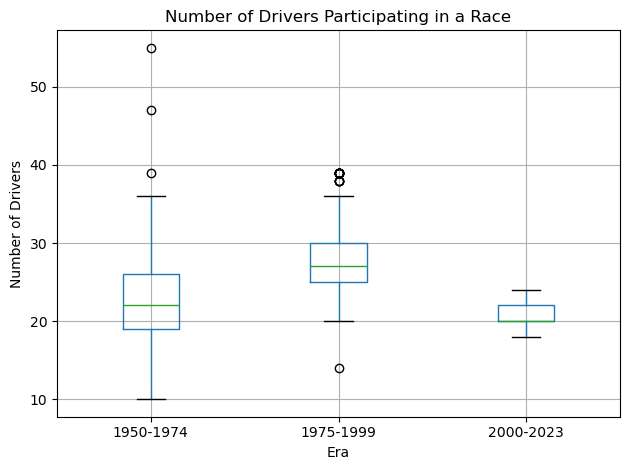

In [9]:
box.boxplot()
plt.title('Number of Drivers Participating in a Race')
plt.xlabel('Era')
plt.ylabel('Number of Drivers')
# plt.xticks(rotation=65)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [10]:
box.describe()

,1950-1974,1975-1999,2000-2023
count,250.000000,396.000000,445.000000
mean,23.116000,27.527778,21.123596
std,5.900662,4.317376,1.453640
min,10.000000,14.000000,18.000000
25%,19.000000,25.000000,20.000000
50%,22.000000,27.000000,20.000000
75%,26.000000,30.000000,22.000000
max,55.000000,39.000000,24.000000


In [11]:
import warnings
warnings.filterwarnings('ignore')

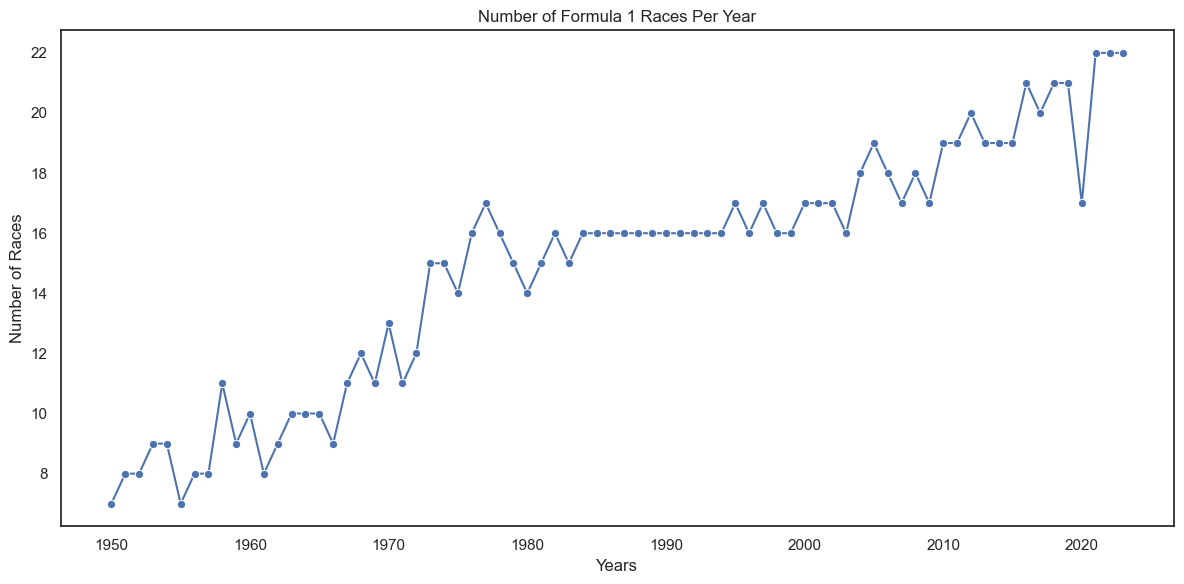

In [12]:
# Count the number of races per year and sort by year
races_per_year = race['year'].value_counts().sort_index()
# Set the aesthetics for the plots
sns.set_theme(style="white")
# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=races_per_year.index, y=races_per_year.values, marker="o")
plt.title('Number of Formula 1 Races Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Races')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

In [13]:
# Create the neccasery DF for the next visual
driver_and_result = pd.merge(drivers, result, on='driverId')
main = pd.merge(driver_and_result, race, on='raceId')
short_main = main[['driverId', 'forename', 'surname', 'date', 'dob', 'points', 'raceId']]

# Convert the 'date' column from object type to datetime64[ns]
short_main['date'] = pd.to_datetime(short_main['date'])

print(short_main.shape)
short_main.head()

(26080, 7)


,driverId,forename,surname,date,dob,points,raceId
0,1,Lewis,Hamilton,2008-03-16,1985-01-07,10.0,18
1,2,Nick,Heidfeld,2008-03-16,1977-05-10,8.0,18
2,3,Nico,Rosberg,2008-03-16,1985-06-27,6.0,18
3,4,Fernando,Alonso,2008-03-16,1981-07-29,5.0,18
4,5,Heikki,Kovalainen,2008-03-16,1981-10-19,4.0,18


In [14]:
short_main.dtypes

driverId             int64
forename            object
surname             object
date        datetime64[ns]
dob         datetime64[ns]
points             float64
raceId               int64
dtype: object

In [15]:
short_main['age'] = (short_main['date'] - short_main['dob']) / pd.Timedelta(days=365)

short_main.groupby('driverId')[['age']].min().sort_values('age', ascending=True)


,age
driverId,
830,17.465753
452,18.158904
840,18.419178
846,19.353425
153,19.356164
...,...
442,52.416438
750,52.835616
760,52.936986


In [16]:
filt = short_main.loc[short_main['points'] != 0]
indeces = filt.groupby('driverId')['age'].idxmin()
pointed_drivers = short_main.loc[indeces].sort_values('points')
pointed_drivers

,driverId,forename,surname,date,dob,points,raceId,age
20422,275,Lella,Lombardi,1975-04-27,1941-03-26,0.5,579,34.109589
12743,81,Gianni,Morbidelli,1991-11-03,1968-01-13,0.5,320,23.821918
19220,119,Riccardo,Patrese,1977-10-23,1954-04-17,1.0,559,23.534247
26036,794,Joie,Chitwood,1950-05-30,1912-04-14,1.0,835,38.150685
17908,117,Alain,Prost,1980-01-13,1955-02-24,1.0,498,24.901370
...,...,...,...,...,...,...,...,...
26048,642,Nino,Farina,1950-05-13,1906-10-30,9.0,833,43.564384
23680,394,Giancarlo,Baghetti,1961-07-02,1934-12-25,9.0,741,26.536986
3315,831,Felipe,Nasr,2015-03-15,1992-08-21,10.0,926,22.578082
4564,842,Pierre,Gasly,2018-04-08,1996-02-07,12.0,990,22.180822


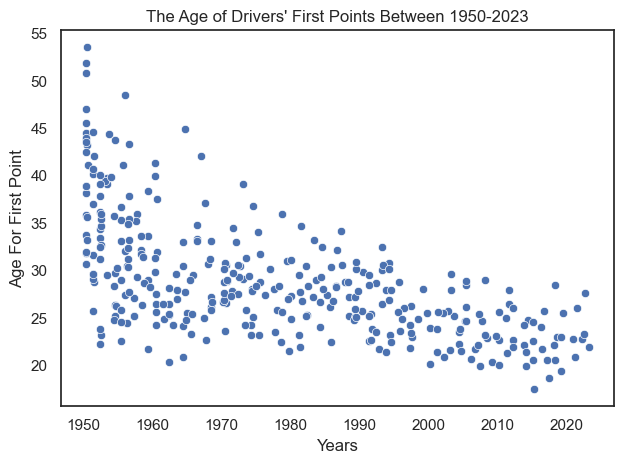

In [17]:
sns.scatterplot(data=pointed_drivers,
                    x='date',
                    y='age',
                    # palette=sns.color_palette('husl'),
                    # sizes=(20,100),
                    # size='points',
                    # hue='',
                    # style='points'
    )
    # sns.color_palette('pastel')
    # plt.legend(loc='best', title ='# Accidents')
plt.title("The Age of Drivers' First Points Between 1950-2023")
plt.xlabel('Years')
plt.ylabel('Age For First Point')
plt.tight_layout()
plt.show()

In [18]:
# - Taking care of constructors data, changing nationality to countries names - #
replacments = {'United Kingdom':'UK', 
               'United States':'USA',
               'United Arab Emirates': 'UAE',
               'South Korea': 'Korea'}

# convert the nationality no country name
nationality_to_country = {
    'British': 'United Kingdom',
    'German': 'Germany',
    'French': 'France',
    'Italian': 'Italy',
    'Japanese': 'Japan',
    'Austrian': 'Austria',
    'Indian': 'India',
    'Dutch': 'Netherlands',
    'Russian': 'Russia',
    'Swiss': 'Switzerland',
    'Irish': 'Ireland',
    'Hong Kong': 'Hong Kong',  # Special Administrative Region of China
    'Brazilian': 'Brazil',
    'Canadian': 'Canada',
    'Mexican': 'Mexico',
    'American': 'United States',
    'Australian': 'Australia',
    'New Zealander': 'New Zealand',
    'South African': 'South Africa',
    'Rhodesian': 'Zimbabwe',  # Rhodesia is now Zimbabwe
    'Belgian': 'Belgium',
    'East German': 'Germany',  # East Germany is now part of Germany
    'Spanish': 'Spain',
    'Malaysian': 'Malaysia'
}
constructors['country'] = constructors['nationality'].map(nationality_to_country)
world = world.rename(columns={'Country': 'country', 'Continent': 'continent'})
constructors['country'] = constructors['country'].replace(replacments)


In [19]:
r_result = result[['constructorId', 'points','raceId', 'resultId']]
c_constructors = constructors[['constructorId', 'name', 'country']]
constructors_and_result = pd.merge(c_constructors, r_result, on='constructorId')
constructors_and_result.head()
# Total points per constructors (full history)

,constructorId,name,country,points,raceId,resultId
0,1,McLaren,UK,10.0,18,1
1,1,McLaren,UK,4.0,18,5
2,1,McLaren,UK,6.0,19,25
3,1,McLaren,UK,4.0,19,27
4,1,McLaren,UK,4.0,20,49


In [20]:
short_race = race[['raceId', 'year']]
test = pd.merge(constructors_and_result, short_race, on='raceId')
test

,constructorId,name,country,points,raceId,resultId,year
0,1,McLaren,UK,10.0,18,1,2008
1,1,McLaren,UK,4.0,18,5,2008
2,2,BMW Sauber,Germany,8.0,18,2,2008
3,2,BMW Sauber,Germany,0.0,18,9,2008
4,3,Williams,UK,6.0,18,3,2008
...,...,...,...,...,...,...,...
26075,138,Nichels,USA,0.0,800,19255,1954
26076,138,Nichels,USA,0.0,800,20232,1954
26077,138,Nichels,USA,0.0,800,20233,1954
26078,139,Bromme,USA,0.0,800,19261,1954


Multiple 

In [21]:
def plot_constructors_country(df, groupy, years, large=None, color1=None, color2=None, color3=None, color4=None):
    '''
    Purpose: I created this function to make my life easier.
            It's very easy to break it but I wanted only 3-4 bars in each graph.

    
    df: DataFrame, define the era or range you want to find
    groupy: string, column name I want to group by
    years: string, to print the years range in the title of the graph
    large: int, define how many bins you want in  the graph
    color1-4: one color in any format but not palette 
    '''
    plt.figure(figsize=(6,7))  # Set the figure size as needed
    
    df = df.groupby([groupy])['points'].sum().reset_index().sort_values(by='points', ascending=False).nlargest(large,'points')
    
    ax = sns.barplot(x=df[groupy], y=df['points'] ,palette=[color1, color2, color3, color4])
    
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height(), 
            round(bar.get_height()), 
            ha='center', 
            va='bottom'
        )
    plt.title(f'Total Constructors Points By {groupy} {years}')
    plt.xlabel('Country')
    plt.ylabel('Total Points')
    plt.xticks(rotation=45)  # Rotate the country names for better readability
    plt.tight_layout()  # Adjust layout to fit all labels
    plt.show()


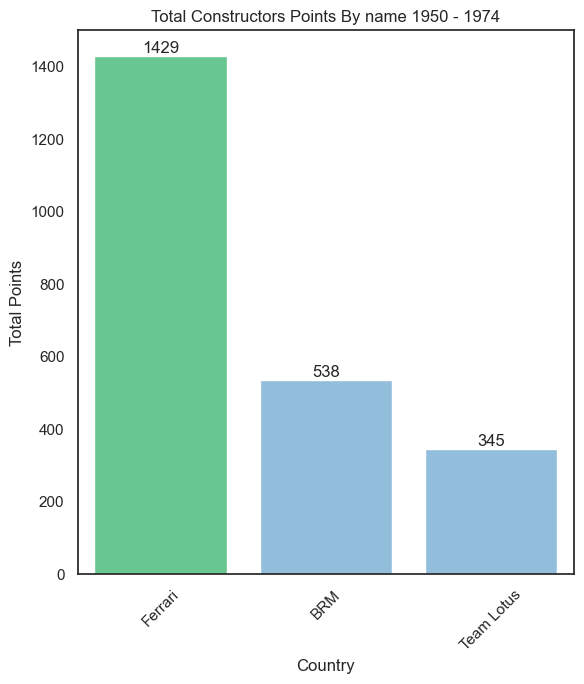

In [22]:
plot_constructors_country(test.loc[test['year'] < 1975],'name', '1950 - 1974' ,3 ,'#58D68D','#85C1E9','#85C1E9')

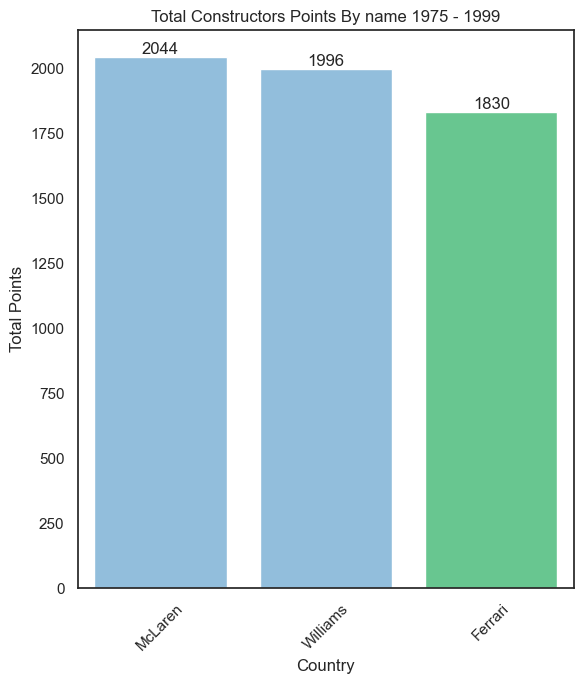

In [23]:
plot_constructors_country(test.loc[(test['year'] >= 1975) & (test['year'] < 2000)],'name','1975 - 1999', 3, '#85C1E9', '#85C1E9','#58D68D')

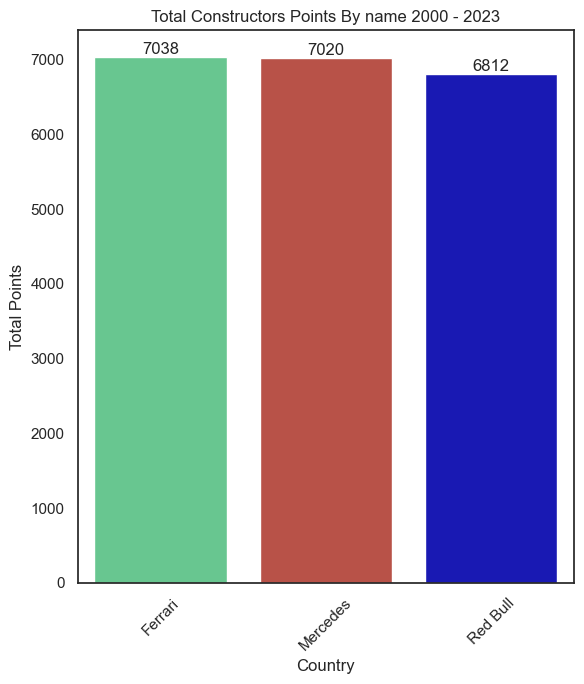

In [24]:
plot_constructors_country(test.loc[test['year'] >= 2000],'name','2000 - 2023', 3, '#58D68D','#CB4335','#0000CC')


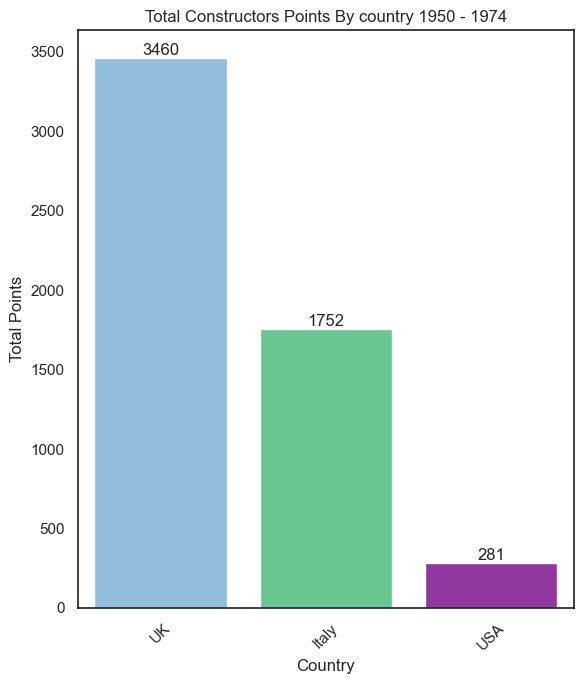

In [25]:
plot_constructors_country(test.loc[test['year'] < 1975],'country', '1950 - 1974' ,3 ,'#85C1E9', '#58D68D','#9C27B0')

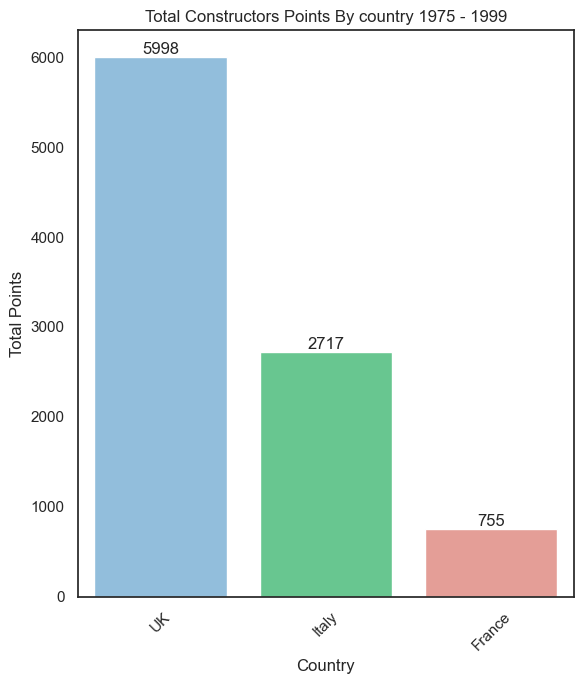

In [26]:
plot_constructors_country(test.loc[(test['year'] >= 1975) & (test['year'] < 2000)],'country','1975 - 1999', 3, '#85C1E9', '#58D68D','#F1948A')

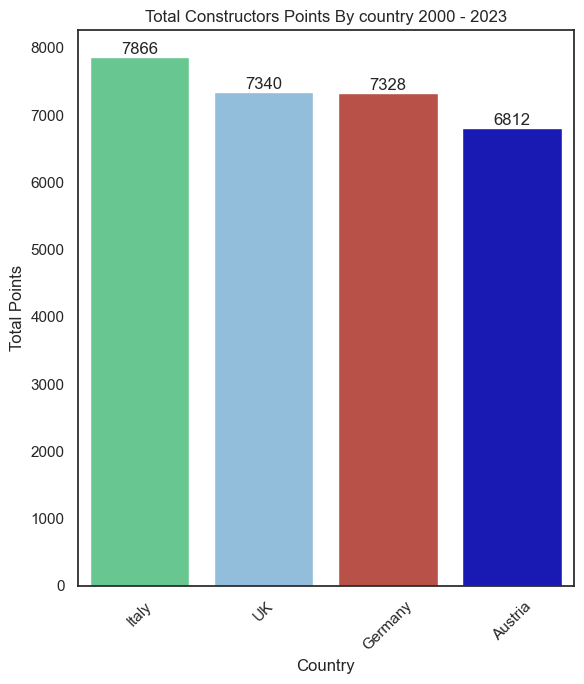

In [27]:
plot_constructors_country(test.loc[test['year'] >= 2000],'country','2000 - 2023', 4, '#58D68D', '#85C1E9' ,'#CB4335','#0000CC')

In [28]:
# convert the nationality column to the countries names
nationality_to_country = {
    'British': 'UK',
    'German': 'Germany',
    'Spanish': 'Spain',
    'Finnish': 'Finland',
    'Japanese': 'Japan',
    'French': 'France',
    'Polish': 'Poland',
    'Brazilian': 'Brazil',
    'Italian': 'Italy',
    'Australian': 'Australia',
    'Austrian': 'Austria',
    'American': 'USA',
    'Dutch': 'Netherlands',
    'Colombian': 'Colombia',
    'Portuguese': 'Portugal',
    'Canadian': 'Canada',
    'Indian': 'India',
    'Hungarian': 'Hungary',
    'Irish': 'Ireland',
    'Danish': 'Denmark',
    'Argentine': 'Argentina',
    'Czech': 'Czech Republic',
    'Malaysian': 'Malaysia',
    'Swiss': 'Switzerland',
    'Belgian': 'Belgium',
    'Monegasque': 'Monaco',
    'Swedish': 'Sweden',
    'Venezuelan': 'Venezuela',
    'New Zealander': 'New Zealand',
    'Chilean': 'Chile',
    'Mexican': 'Mexico',
    'South African': 'South Africa',
    'Liechtensteiner': 'Liechtenstein',
    'Rhodesian': 'Zimbabwe',  # Rhodesia is now Zimbabwe
    'American-Italian': 'United States/Italy',  # Dual nationality, interpretative
    'Uruguayan': 'Uruguay',
    'Argentine-Italian': 'Argentina/Italy',  # Dual nationality, interpretative
    'Thai': 'Thailand',
    'East German': 'Germany',  # East Germany has since reunified with Germany
    'Russian': 'Russia',
    'Indonesian': 'Indonesia',
    'Chinese': 'China'
}

drivers['country'] = drivers['nationality'].map(nationality_to_country)

# A dictionary with the right names for later, so I can replace the countries names
replacments = {'United Kingdom':'UK', 
               'United States':'USA',
               'United Arab Emirates': 'UAE',
               'South Korea': 'Korea'}

# rename the country and continent to lowercase merge the right column name (from world DF)
world = world.rename(columns={'Country': 'country', 'Continent': 'continent'})

# replace the country name to a shorter version using the dictionary above
drivers['country'] = drivers['country'].replace(replacments)


In [29]:
d_result = result[['driverId', 'points', 'resultId','raceId']]
d_driver = drivers[['driverId', 'forename', 'surname' ,'country']]
d_race = race[['raceId', 'year']]
championship = pd.merge(d_driver, d_result, on='driverId')
champ = pd.merge(championship, d_race, on='raceId')

In [30]:
# Calculate the total number of points each driver get in every year to measure who was the winner that year.
years = champ['year'].unique()
champions = {}
for year in years:
    # Filter data for the current year
    data_year = champ.loc[champ['year'] == year]
    # display(data_year)    
    # Group by surname, sum the points, and sort
    driver_points = data_year.groupby(['driverId'])[['points']].sum().reset_index().sort_values(by='points', ascending=False)
    # display(driver_points)    
    # Select the champion (top driver)
    champion = driver_points.iloc[0]
    # display(champion)    
    # Store the champion in the dictionary
    # display(drivers.loc[drivers['driverId'] == champion['driverId']])
    champions[year] = drivers.loc[drivers['driverId'] == champion['driverId']].country.values[0] #champion['driverId']#+ ', ' + champion['forename'] + ' ' + champion['surname']
    # print(champions)
# Convert the champions dictionary to a DataFrame for nicer display if desired
champions_df = pd.DataFrame(list(champions.items()), columns=['Year', 'Champion']).sort_values(by='Year')
champions_df = champions_df['Champion'].value_counts().reset_index()

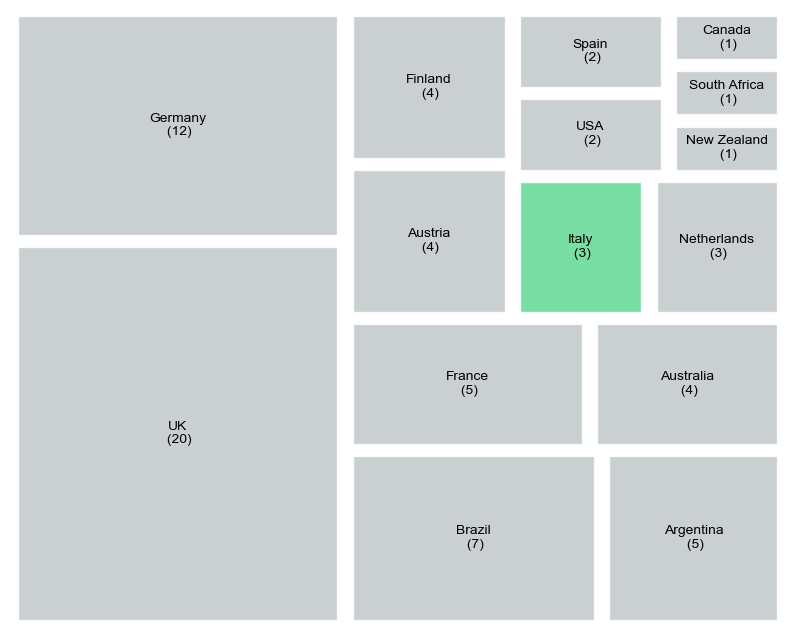

In [31]:
# ITALY only
import squarify
# Define your colors for the rectangles

colors=['#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7',
        '#BDC3C7','#BDC3C7','#BDC3C7','#58D68D','#BDC3C7',
        '#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7']


# Create a figure to plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# Create a squarify plot without the labels
squarify.plot(sizes=champions_df['count'],alpha=.8, color=colors, pad=True)

# Add labels manually with custom font properties
for rect, (label, count) in zip(ax.patches, zip(champions_df['Champion'], champions_df['count'])):
    x, y, dx, dy = rect.get_x(), rect.get_y(), rect.get_width(), rect.get_height()
    label_text = f"{label}\n ({count})"  # Format the label with the count
    ax.text(x+dx/2, y+dy/2, label_text,
            va='center', ha='center',  # center alignment
            color='black',             # white font color for visibility
            fontname='sans-serif',     # font
            fontsize=10)               # size of the font

# Display the plot
plt.axis('off')
plt.show()

In [32]:
result_race = pd.merge(result, race, on='raceId')
race_result_circuit = pd.merge(result_race, circuits, on='circuitId')
driver_result = pd.merge(race_result_circuit, drivers, on='driverId')

In [33]:
drivers_result_points = driver_result[['raceId', 'driverId' ,'forename' ,'surname', 'nationality', 'year','points']]

In [34]:
total_driver_points = drivers_result_points.groupby(['year','nationality'])[['points']].sum().reset_index().sort_values('points',ascending=False)

In [35]:
def plot_points_by_nationality(era, years, large, color1, color2, color3, color4=None):
    plt.figure(figsize=(6,7))  # Set the figure size as needed

    df = era.groupby('nationality')['points'].sum().reset_index().\
                                sort_values('points',ascending=False)\
                                .nlargest(large,'points')
    ax = sns.barplot(x=df['nationality'], y=df['points'] ,palette=[color1, color2, color3, color4])
    
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height(), 
            round(bar.get_height()), 
            ha='center', 
            va='bottom'
        )
    plt.title(f'Drivers Points by Nationality {years}')
    plt.xlabel('Nationality')
    plt.ylabel('Sum Points')
    plt.xticks(rotation=45)  # Rotate the country names for better readability
    plt.tight_layout()  # Adjust layout to fit all labels
    plt.show()

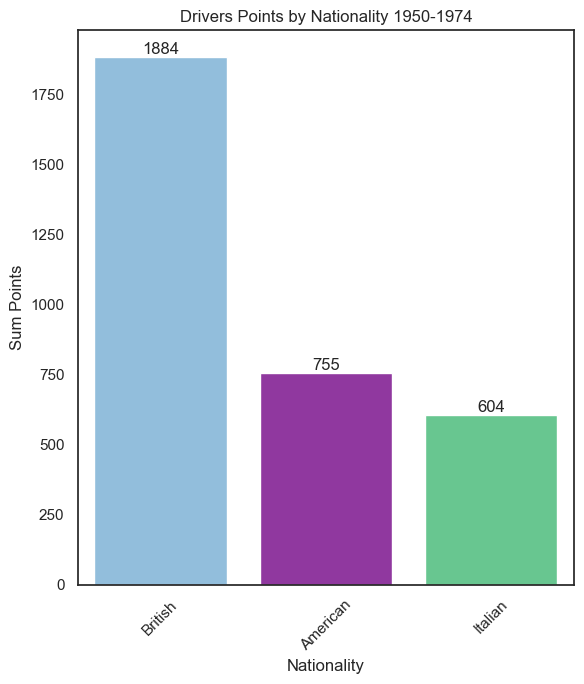

In [36]:
plot_points_by_nationality(total_driver_points.loc[total_driver_points['year'] < 1975], "1950-1974", 3, '#85C1E9','#9C27B0','#58D68D')

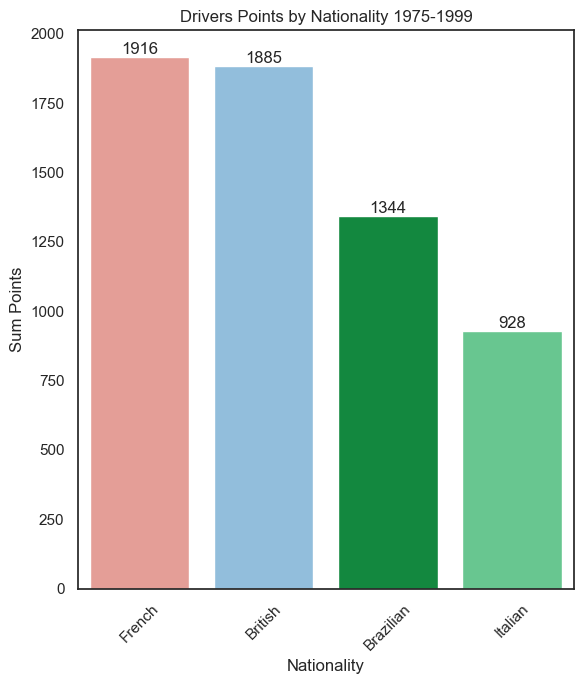

In [37]:
plot_points_by_nationality(total_driver_points.loc[(total_driver_points['year'] >= 1975) & (total_driver_points['year'] < 2000)], "1975-1999", 4,'#F1948A','#85C1E9','#009B3A','#58D68D')

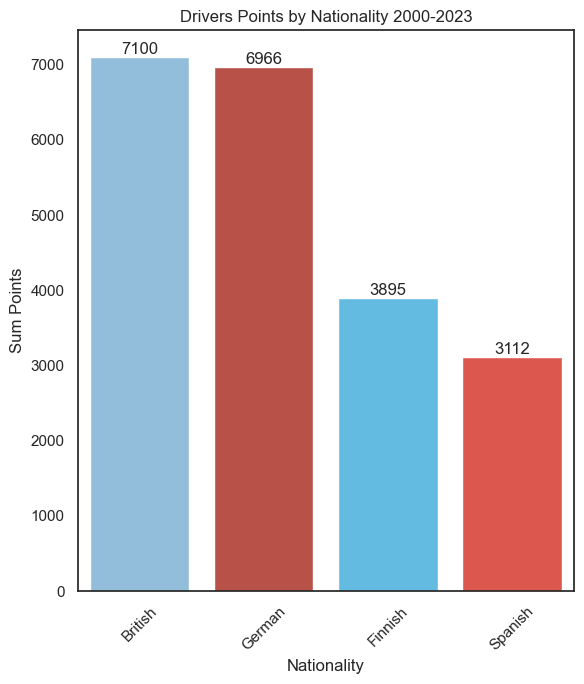

In [38]:
plot_points_by_nationality(total_driver_points.loc[total_driver_points['year'] >= 2000], "2000-2023", 4,'#85C1E9' ,'#CB4335','#4FC3F7','#F44336')